When the following expression is positive, the ground station is in view:
$$ r(sin(\phi)cos(2\pi t)cos(i)cos(2\pi \omega t)+sin(\phi)sin(2\pi t)sin(2\pi \omega t)-cos(\phi)sin(i)cos(2\pi\omega t))-1$$

Where t is in units of days, $$r=1+h/R$$ and h is the altitude and R the radius of the Earth, and $$\omega=\frac{T2}{T1}$$ where $T2 = 86400$ (seconds in a day), and $$T1 =2\pi\sqrt{\frac{(h+R)^2}{\mu}}$$ 

Verified in Geogebra: ![ground station](ground_station.PNG)

In [1]:
import numpy as np

In [28]:
import matplotlib.pyplot as plt

In [11]:
from numpy import sin, cos, pi, sqrt, linspace

In [128]:
def gs(l, i, h):
    R = 6378e3
    r = 1+h*1e3/R
    N = 100000
    maxd = 10
    t = linspace(0,maxd,N)
    #l = 0.8*np.pi/2
    #i = 0.8
    mu = 3.98e14
    T2 = 86400
    T1 = 2*pi*sqrt((R*r)**3/mu)
    w = T2/T1
    f = r*(sin(l)*cos(2*pi*t)*cos(i)*cos(2*pi*w*t)+sin(l)*sin(2*pi*t)*sin(2*pi*w*t)\
           -cos(l)*sin(i)*cos(2*pi*w*t))-1
    g = np.sum(f>=0)/(float(N))
    return g


In [125]:
1/pi*np.arccos((R/(R+h*1e3)))

0.10990150360973461

In [126]:
ls = linspace(0, pi/2)

In [153]:
lateff = map(lambda l: gs(l, 0, 400), ls)
lateff2 = map(lambda l: gs(l, 0, 300), ls)
lateff3 = map(lambda l: gs(l, 0.2, 300), ls)
lateff4 = map(lambda l: gs(l, 0.5, 300), ls)
lateff5 = map(lambda l: gs(l, np.pi/2, 300), ls)

In [148]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

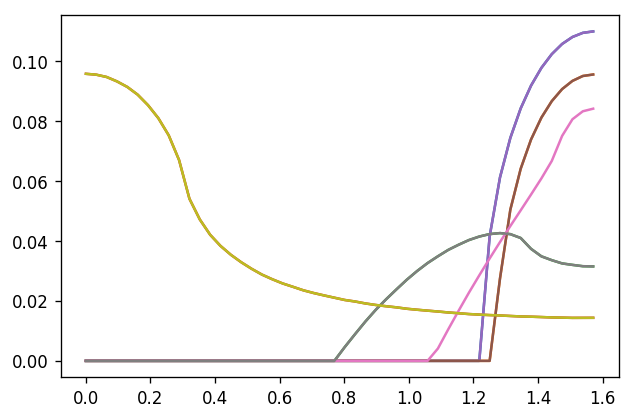

In [154]:
plt.plot(ls, lateff)
plt.plot(ls, lateff2)
plt.plot(ls, lateff3)
plt.plot(ls, lateff4)
plt.plot(ls, lateff5)
plt.show()

In [162]:
3*mu/(2*(h+R)**3)*1000/40

5.751473015718447e-05

In [119]:
gs(pi/2, 0, 400.)

0.109931

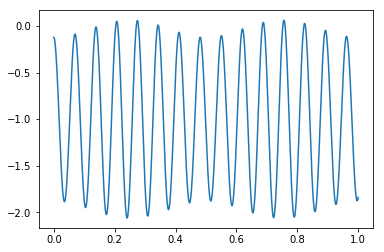

In [57]:
plt.plot(t,g)
plt.show()